# Ayudantía 2: Singular Value Decomposition (SVD)

# Definición
La factorización SVD consiste en encontrar las matrices $U \Sigma V^T$ tal que:
$$
A = U \Sigma V^T
$$
$$
\begin{bmatrix}
 &  &  \\
 & A &  \\
 &  & 
\end{bmatrix}
=
\begin{bmatrix}
 &  &  \\
 & U &  \\
 &  & 
\end{bmatrix}
\begin{bmatrix}
 &  &  \\
 & \Sigma &  \\
 &  & 
\end{bmatrix}
\begin{bmatrix}
 &  &  \\
 & V^T &  \\
 &  & 
\end{bmatrix}
$$
---

## Propiedades interesantes

### 1. Existecia
La SVD existe para cualquier matriz.
### 2. La matriz $\Sigma$
Es una matriz diagonal cuyos valores en la diagonal son los **valores singulares** de la matriz original ordenados de manera descendente.
$$
\begin{bmatrix}
\sigma_1 &  &  \\
 & \sigma_2 &  \\
 &  &  \sigma_3
\end{bmatrix}
$$
 tal que $\sigma_1 \geq \sigma_2 \geq \sigma_3$
2. $U$ y $V$ 

### 3. $U$ y $V^T$
son matrices *ortogonales*

---

# Conocimiento Previo

---

# Ejercicio

Dada la matriz A
$$
A =
\begin{bmatrix}
2 & 1 & 0 \\
1 & 2 & 0 \\
0 & 0 & 2
\end{bmatrix}
$$

1. Calculé los **valores singulares** 

Donde estas matrices tienen ciertas propiedades interesantes:



# Ejemplo Práctico

Image Shape: (736, 736, 3)


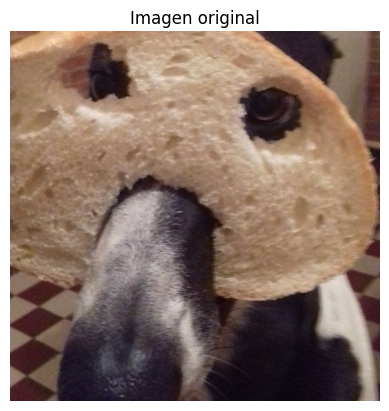

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

img = plt.imread('../Assets/greyhound.jpg')

print("Image Shape:", img.shape)

plt.imshow(img)
plt.title("Imagen original")
plt.axis('off')
plt.show()


In [2]:

img_float = img.astype(np.float32) / 255.0

print("Shape de la imagen:", img_float.shape)  

R = img_float[..., 0]
G = img_float[..., 1]
B = img_float[..., 2]
U_r, S_r, Vt_r = np.linalg.svd(R, full_matrices=False)
U_g, S_g, Vt_g = np.linalg.svd(G, full_matrices=False)
U_b, S_b, Vt_b = np.linalg.svd(B, full_matrices=False)

max_rank = min(R.shape[0], R.shape[1])

def svd_approx(k):
    """Reconstruye la imagen usando los primeros k valores singulares en cada canal."""
    R_approx = U_r[:, :k] @ np.diag(S_r[:k]) @ Vt_r[:k, :]
    G_approx = U_g[:, :k] @ np.diag(S_g[:k]) @ Vt_g[:k, :]
    B_approx = U_b[:, :k] @ np.diag(S_b[:k]) @ Vt_b[:k, :]

    img_approx = np.stack([R_approx, G_approx, B_approx], axis=2)
    return img_approx

@interact(k=IntSlider(min=1, max=max_rank, step=1, value=1))
def show_svd_approx(k):
    """Muestra la imagen aproximada para un k dado."""
    approx = svd_approx(k)
    plt.figure(figsize=(6,6))
    plt.imshow(np.clip(approx, 0, 1))
    plt.title(f"Aproximación con k={k}")
    plt.axis('off')
    plt.show()

Shape de la imagen: (736, 736, 3)


interactive(children=(IntSlider(value=1, description='k', max=736, min=1), Output()), _dom_classes=('widget-in…

Con $k=100$ ya tenemos una aproximación bastante buena, ahora veamos que tanto espacio estamos ahorrado